# 库

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('./SimilarityNetPkg')
from SimilarityNetPkg.get_feature_class import SimilarityNet

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 模型

In [2]:
s=SimilarityNet()
#1.5GB cuda

paser_config finished
model loaded:  ft_net(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (d

# 获得所有人的二维数组

list[i][0]=name

list[i][1]=img_path

In [3]:
all_human=[]

img_filter_name=['jpg','png','jpeg']
root_path='.\\human'
for root, dirs, files in os.walk(root_path):
    for dir in dirs:
        one_human_str=[]
        one_human_str.append(dir)
        print(dir)
        
        for root2, dirs2, files2 in os.walk(os.path.join(root_path,dir)): 
            for file in files2:
                this_file_path=os.path.join(root_path,dir,file)
                print(this_file_path)
                if(this_file_path[-3:] in img_filter_name):
                    one_human_str.append(this_file_path)
                    
        all_human.append(one_human_str)
print("**************")
for human in all_human:
    print(human)

孙笑川
.\human\孙笑川\1.png
.\human\孙笑川\2.png
.\human\孙笑川\3.png
李尚杰
.\human\李尚杰\1.png
.\human\李尚杰\2.png
.\human\李尚杰\3.png
王子威
.\human\王子威\1.png
.\human\王子威\2.png
.\human\王子威\3.jpg
.\human\王子威\4.png
.\human\王子威\5.png
胡歌
.\human\胡歌\1.png
.\human\胡歌\2.png
.\human\胡歌\3.png
赵璐思
.\human\赵璐思\1.png
.\human\赵璐思\2.png
.\human\赵璐思\3.png
跳舞的
.\human\跳舞的\1.png
.\human\跳舞的\2.png
.\human\跳舞的\3.png
**************
['孙笑川', '.\\human\\孙笑川\\1.png', '.\\human\\孙笑川\\2.png', '.\\human\\孙笑川\\3.png']
['李尚杰', '.\\human\\李尚杰\\1.png', '.\\human\\李尚杰\\2.png', '.\\human\\李尚杰\\3.png']
['王子威', '.\\human\\王子威\\1.png', '.\\human\\王子威\\2.png', '.\\human\\王子威\\3.jpg', '.\\human\\王子威\\4.png', '.\\human\\王子威\\5.png']
['胡歌', '.\\human\\胡歌\\1.png', '.\\human\\胡歌\\2.png', '.\\human\\胡歌\\3.png']
['赵璐思', '.\\human\\赵璐思\\1.png', '.\\human\\赵璐思\\2.png', '.\\human\\赵璐思\\3.png']
['跳舞的', '.\\human\\跳舞的\\1.png', '.\\human\\跳舞的\\2.png', '.\\human\\跳舞的\\3.png']


# class

In [4]:
class people:
    def __init__(self):
        self.id=0
        self.img_list_self=[]
        self.img_list_other=[]
        self.f_self=[]
        self.f_other=[]
        self.s_self=[]
        self.s_other=[]
    def get_f(self):
        
        self.f_self=s.get_multi_img_feature(self.img_list_self).cpu().numpy()
        
        self.f_other=s.get_multi_img_feature(self.img_list_other).cpu().numpy()
        
    def get_s_self(self):
        for i in range (0,len(self.f_self)):
            if((i+1)!=len(self.f_self)):
                for j in range(i+1,len(self.f_self)):
                    vec1=self.f_self[i]
                    vec2=self.f_self[j]
                    d=np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
                    if(d<0.8):
                        print("self s<0.8 :",self.img_list_self[i],' ',self.img_list_self[j])
                    #print('s_self:',d)
                    self.s_self.append(d)
                    
    def get_s_other(self):
        for i in range(0,len(self.f_self)):
            for j in range(0,len(self.f_other)):
                vec1=self.f_self[i]
                vec2=self.f_other[j]
                
                d=np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
                if(d>0.8):
                        print("otherf s>0.8 :",self.img_list_self[i],' ',self.img_list_other[j])
                #print('s_other:',d)
                self.s_other.append(d)

            
    def plot_self(self):
        #print(self.s_other)
        #print(self.s_self)
        xs=np.arange(0,len(self.s_self),1)
        xo=np.arange(0,len(self.s_other),1)
        title_str='ID:'+self.id
        plt.title(title_str)  # 折线图标题
        
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字
        plt.xlabel('图像n')  # x轴标题
        plt.ylabel('相似度[0-1]')  # y轴标题

        plt.plot(xs, self.s_self, marker='o', markersize=3)  # 绘制折线图，添加数据点，设置点的大小
        plt.plot(xo, self.s_other, marker='o', markersize=3)  # 绘制折线图，添加数据点，设置点的大小
        plt.hlines(0.8,0,len(self.s_other),color="red")#横线
        
        same_tile='相同组: 最小值:'+str(max(self.s_self))[:4]+' 最小值:'+str(min(self.s_self))[:4]+' 均值:'+str(np.mean(self.s_self))[:4]
        diff_tile='不同组: 最大值:'+str(max(self.s_other))[:4]+' 最小值:'+str(min(self.s_other))[:4]+' 均值:'+str(np.mean(self.s_other))[:4]
        plt.legend([same_tile, diff_tile])  # 设置折线名称
        plt.show()  # 显示折线图
    def run(self):
        self.get_f()
        self.get_s_self()
        self.get_s_other()
        self.plot_self()

In [5]:
peoples=[]
for i in range(0,len(all_human)):
    one_people=people()
    
    one_people.id=all_human[i][0]
    one_people.img_list_self=all_human[i][1:]
    
    for j in range(0,len(all_human)):
        if(i!=j):
            for k in range(1,len(all_human[j])):
                one_people.img_list_other.append(all_human[j][k])
    peoples.append(one_people)

In [6]:
print(peoples[3].img_list_self)
print('***********************')
print(peoples[3].img_list_other)

['.\\human\\胡歌\\1.png', '.\\human\\胡歌\\2.png', '.\\human\\胡歌\\3.png']
***********************
['.\\human\\孙笑川\\1.png', '.\\human\\孙笑川\\2.png', '.\\human\\孙笑川\\3.png', '.\\human\\李尚杰\\1.png', '.\\human\\李尚杰\\2.png', '.\\human\\李尚杰\\3.png', '.\\human\\王子威\\1.png', '.\\human\\王子威\\2.png', '.\\human\\王子威\\3.jpg', '.\\human\\王子威\\4.png', '.\\human\\王子威\\5.png', '.\\human\\赵璐思\\1.png', '.\\human\\赵璐思\\2.png', '.\\human\\赵璐思\\3.png', '.\\human\\跳舞的\\1.png', '.\\human\\跳舞的\\2.png', '.\\human\\跳舞的\\3.png']


# 测试每个人 与自己的相似度 与其他人的相似度

孙笑川
time used multi img: 1.3149807453155518
time used multi img: 0.21210241317749023


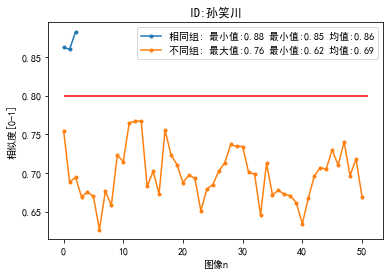

李尚杰
time used multi img: 0.04400992393493652
time used multi img: 0.18409109115600586
otherf s>0.8 : .\human\李尚杰\1.png   .\human\王子威\1.png
otherf s>0.8 : .\human\李尚杰\1.png   .\human\王子威\2.png
otherf s>0.8 : .\human\李尚杰\1.png   .\human\王子威\3.jpg
otherf s>0.8 : .\human\李尚杰\1.png   .\human\赵璐思\2.png


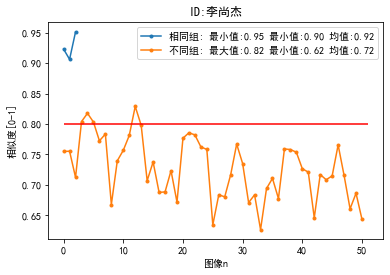

王子威
time used multi img: 0.07001638412475586
time used multi img: 0.14603352546691895
otherf s>0.8 : .\human\王子威\1.png   .\human\李尚杰\1.png
otherf s>0.8 : .\human\王子威\2.png   .\human\李尚杰\1.png
otherf s>0.8 : .\human\王子威\3.jpg   .\human\李尚杰\1.png


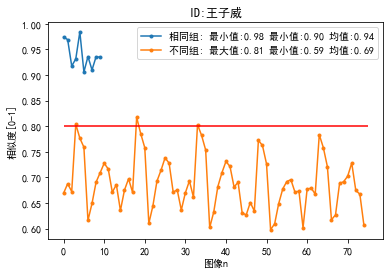

胡歌
time used multi img: 0.040047407150268555
time used multi img: 0.17943620681762695
self s<0.8 : .\human\胡歌\1.png   .\human\胡歌\2.png


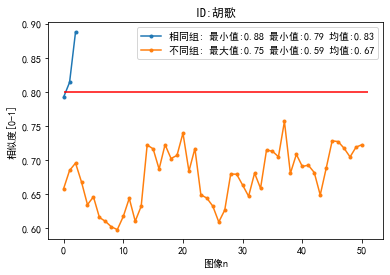

赵璐思
time used multi img: 0.03600811958312988
time used multi img: 0.17403960227966309
otherf s>0.8 : .\human\赵璐思\2.png   .\human\李尚杰\1.png


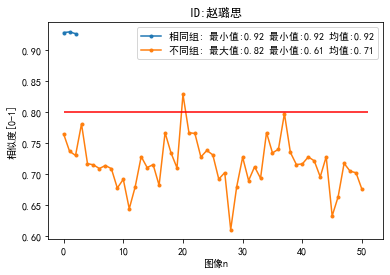

跳舞的
time used multi img: 0.041008949279785156
time used multi img: 0.17904090881347656


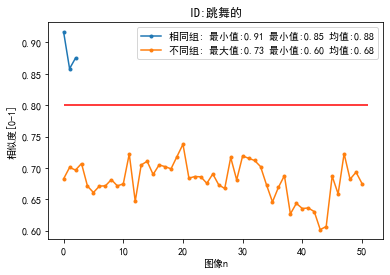

In [7]:
for i in range(0,len(peoples)):
    print(peoples[i].id)
    peoples[i].run()